In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
# قراءة البيانات
file_path = r'C:\Users\msmas\Desktop\دوري الذكاء الأصطناعي\DataSet\تصنيف اللاعبين .csv'
df = pd.read_csv(file_path, encoding='windows-1256', sep=';')

In [9]:
df.head()

,اسم اللاعب,العمر,المركز,عدد التمريرات,دقة التمريرات (%),عدد التسديدات,عدد الأهداف,نسبة النجاح في المواجهات (%),السرعة القصوى (كم/س),المسافة المقطوعة (كم),معدل نبض القلب,نسبة التعب في نهاية الشوط,التقييم العام,تصنيف اللاعب,تصنيف اللاعب2
0,سعود القحطاني,23,وسط,91,67.96,11,4,47.24,31.31,9.19,125,48.07,5.37,غير موهوب,غير موهوب
1,راكان المالكي,22,دفاع,46,79.73,3,3,65.58,26.62,6.56,153,23.19,6.56,غير موهوب,غير موهوب
2,ناصر الشمري,19,دفاع,31,70.01,7,1,71.51,24.76,8.40,119,49.40,8.78,موهوب,موهوب
3,خالد الغامدي,21,دفاع,30,86.79,2,3,81.95,32.90,7.12,174,34.03,5.60,غير موهوب,غير موهوب
4,أحمد البلوي,23,دفاع,72,68.67,9,2,48.23,28.78,11.04,157,36.68,8.77,موهوب,موهوب


In [11]:
# حذف الأعمدة النصية غير المفيدة للنموذج
df = df.drop(['اسم اللاعب', 'المركز', 'تصنيف اللاعب2'], axis=1)

In [13]:
# تحويل التصنيف إلى أرقام
df['تصنيف اللاعب'] = df['تصنيف اللاعب'].map({'موهوب': 1, 'غير موهوب': 0})

In [15]:
# فصل الميزات (X) والهدف (y)
X = df.drop('تصنيف اللاعب', axis=1)
y = df['تصنيف اللاعب']

In [17]:
# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# تدريب النموذج
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, classification_report

# التنبؤ بالنتائج
y_pred = model.predict(X_test)

# تقييم الأداء
print("✅ دقة النموذج:", accuracy_score(y_test, y_pred))
print("\n📋 تقرير التصنيف:\n", classification_report(y_test, y_pred))

✅ دقة النموذج: 0.98

📋 تقرير التصنيف:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       958
           1       0.98      0.98      0.98      1042

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



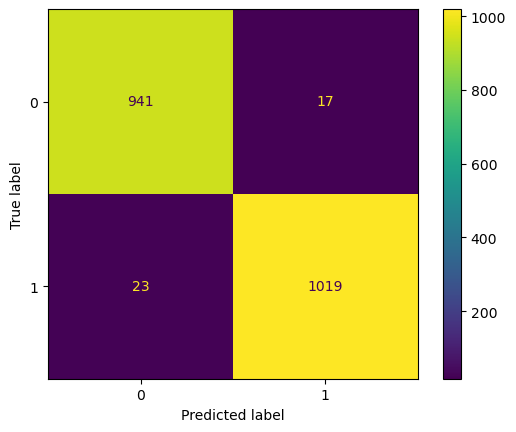

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [25]:
# بيانات لاعب جديد بنفس ترتيب أعمدة X
new_player = [[50, 85.5, 4, 2, 70.0, 29.5, 10.2, 140, 25.0, 7.5]]

In [29]:
print("عدد الأعمدة التي تم تدريب النموذج عليها:", len(X.columns))
print("أسماء الأعمدة:", list(X.columns))

عدد الأعمدة التي تم تدريب النموذج عليها: 11
أسماء الأعمدة: ['العمر', 'عدد التمريرات', 'دقة التمريرات (%)', 'عدد التسديدات', 'عدد الأهداف', 'نسبة النجاح في المواجهات (%)', 'السرعة القصوى (كم/س)', 'المسافة المقطوعة (كم)', 'معدل نبض القلب', 'نسبة التعب في نهاية الشوط', 'التقييم العام']


In [31]:
# إدخال بيانات لاعب جديد 
new_player = pd.DataFrame([[
    21,     # العمر
    60,     # عدد التمريرات
    83.5,   # دقة التمريرات
    5,      # عدد التسديدات
    2,      # عدد الأهداف
    70.2,   # نسبة النجاح في المواجهات
    31.1,   # السرعة القصوى
    10.2,   # المسافة المقطوعة
    150,    # معدل نبض القلب
    28.5,   # نسبة التعب
    8.1     # التقييم العام
]], columns=[
    'العمر', 'عدد التمريرات', 'دقة التمريرات (%)', 'عدد التسديدات',
    'عدد الأهداف', 'نسبة النجاح في المواجهات (%)', 'السرعة القصوى (كم/س)',
    'المسافة المقطوعة (كم)', 'معدل نبض القلب', 'نسبة التعب في نهاية الشوط',
    'التقييم العام'
])

In [33]:
# التنبؤ بالتصنيف
prediction = model.predict(new_player)

In [53]:
# عرض النتيجة
if prediction[0] == 1:
    print(" التوصية: اللاعب موهوب ")
else:
    print(" التوصية: اللاعب غير موهوب ")

 التوصية: اللاعب موهوب 


In [37]:
# التأكد من ادخال بيانات لاعب جديد موهوب و التحقق من عمل النموذج 
new_player_1 = pd.DataFrame([[21, 60, 83.5, 5, 2, 70.2, 31.1, 10.2, 150, 28.5, 8.1]], columns=X.columns)
print(model.predict(new_player_1))

[1]


In [39]:
# التأكد من ادخال بيانات لاعب جديد غير موهوب و التحقق من عمل النموذج 
new_player_2 = pd.DataFrame([[23, 30, 60.0, 1, 0, 45.0, 26.0, 7.0, 160, 45.0, 5.0]], columns=X.columns)
print(model.predict(new_player_2))  

[0]


In [69]:
!pip install arabic_reshaper python-bidi --quiet

In [71]:
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
# إعداد البيانات
features = pd.Series(model.feature_importances_, index=X.columns)

In [75]:
# إعادة تشكيل النصوص بالعربية
reshaped_labels = [get_display(arabic_reshaper.reshape(col)) for col in features.sort_values().index]

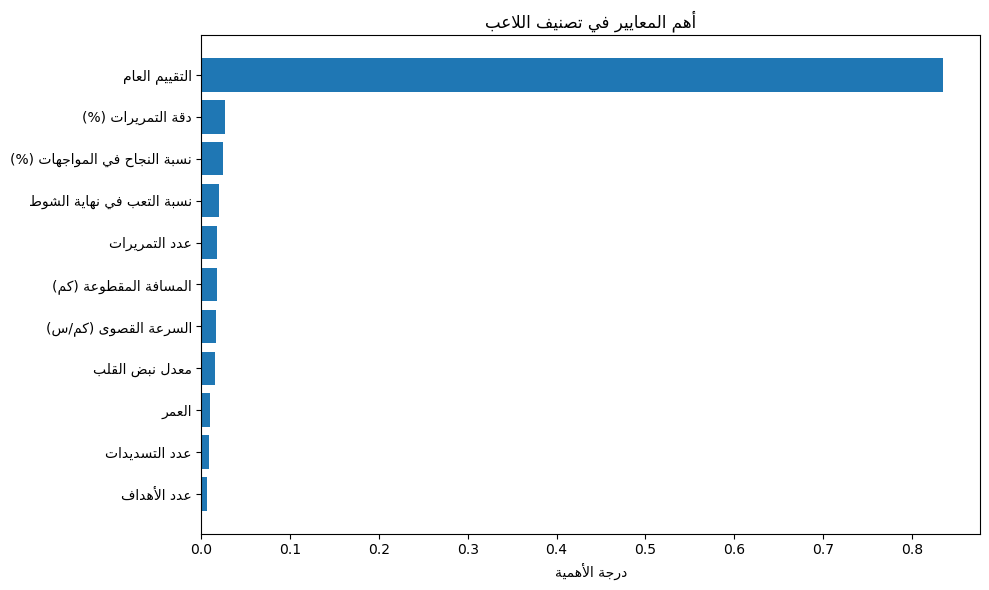

In [77]:
# الرسم
plt.figure(figsize=(10, 6))
plt.barh(reshaped_labels, features.sort_values())
plt.title(get_display(arabic_reshaper.reshape('أهم المعايير في تصنيف اللاعب')))
plt.xlabel(get_display(arabic_reshaper.reshape('درجة الأهمية')))
plt.tight_layout()
plt.show()

In [79]:
plt.savefig(r'C:\Users\msmas\Documents\Player\feature_importance.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [81]:
# عرض الصورة بعد الحفظ
plt.show()

In [83]:
import joblib

In [85]:
# حفظ النموذج
joblib.dump(model, 'player_model.pkl')

['player_model.pkl']

In [87]:
# تحميل النموذج
loaded_model = joblib.load('player_model.pkl')

In [89]:
# اختبار سريع
print(loaded_model.predict(new_player_1))

[1]


In [91]:
joblib.dump(model, r'C:\Users\msmas\Documents\Player\player_model.pkl')

['C:\\Users\\msmas\\Documents\\Player\\player_model.pkl']